# 1

In [67]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [68]:
class Config:
    TRAINING_FILE = "train_data_2000.csv"
    CONTACT_FILE = "contact_data_2000.csv"
    TEST_FILE = "test_data_2000.csv"
    MODEL_OUTPUT = "../models/"
    PROCESSED_DATA_OUTPUT = "processed_data.csv"


config = Config()

In [69]:
test = pd.read_csv(config.TEST_FILE)
train = pd.read_csv(config.TRAINING_FILE)
contact = pd.read_csv(config.CONTACT_FILE)

In [70]:
train.head()

,cellid,phase,order_within_phase,order
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0


In [71]:
test.head()

,cellid,phase,order_within_phase,order
0,SCG0089_CTTATGTTCCCGCCTA-1,NaN,NaN,NaN
1,SCG0093_AGAACCGCACAGCCAT-1,NaN,NaN,NaN
2,SCG0090_CCAGGATGTGCTCACC-1,NaN,NaN,NaN
3,SCG0089_TACCTTTAGCACTTGG-1,NaN,NaN,NaN
4,SCG0092_TGATCAGGTTTGAGGC-1,NaN,NaN,NaN


In [72]:
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1


In [73]:
contact['intra'] = (contact['chr1'] == contact['chr2']).astype(int)
contact['log_dist'] = np.where(contact['intra'] == 1, (np.log2(
    np.abs(contact['end2'] - contact['end1']) + 1) + 0.1) / 0.1, 0)

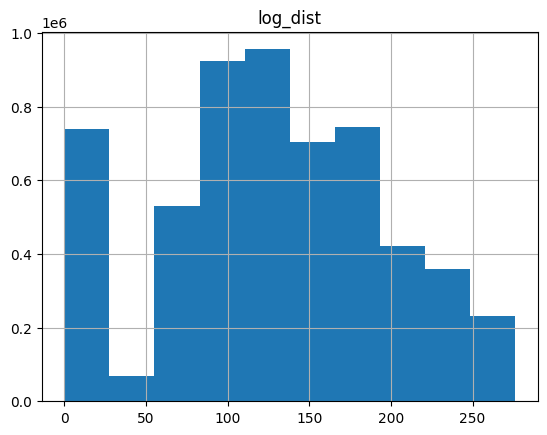

In [74]:
contact.hist(column='log_dist')
plt.show()

In [75]:
n = (contact['log_dist'] > 0).sum()
bins = [-1, 0, 50, 100, 150, 200, 250, 300]
labels = ['0', '0-50', '50-100', '100-150', '150-200', '200-250', '250-300']
contact['log_dist_bin'] = pd.cut(contact['log_dist'], bins = bins, labels = labels)
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200


In [ ]:
contact.shape

(5692403, 10)

In [ ]:
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200


In [ ]:
same_chr = contact[contact['chr1'] == contact['chr2']]
len(same_chr) / len(contact)

0.8705929639907786

In [ ]:
min_start = min(same_chr['start1'].min(), same_chr['start2'].min())
min_start

3000454

In [ ]:
max_end = max(contact['end1'].max(), contact['end2'].max())
max_end = int(max_end)
max_end

195371706

In [ ]:
(max_end - min_start) / 500000

384.742504

In [ ]:
bin_len = 500000 * 8
bins = list(range(0, max_end + bin_len, bin_len))
labels = list(range(1, len(bins)))
same_chr['bin1'] = pd.cut(same_chr['start1'], bins = bins, labels = labels)
same_chr['bin2'] = pd.cut(same_chr['start2'], bins = bins, labels = labels)
same_chr.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin,bin1,bin2
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250,19,19
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150,35,35
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200,13,13
6,chr2-P,145420794,145420944,chr2-P,145425879,145426029,SCG0088_GCCTGTGCAATTTGGT-1,1,124.123157,100-150,37,37
7,chr10-P,59254540,59254677,chr10-P,59271268,59271408,SCG0088_TTTAACCTCAGCCAAT-1,1,141.303223,100-150,15,15


In [ ]:
contacts_count = same_chr.groupby(['cellid', 'bin1', 'bin2']).size().reset_index(name='count')
contacts_count['fraction'] = contacts_count['count'] / contacts_count.groupby('cellid')['count'].transform('sum')
contacts_count['column_label'] = contacts_count['bin1'].astype(str) + '-' + contacts_count['bin2'].astype(str) + 'cf' # bin i-j contacts fraction
contacts_count = contacts_count.pivot(index='cellid', columns='column_label', values='fraction').fillna(0).reset_index()
contacts_count

column_label,cellid,1-10cf,1-11cf,1-12cf,1-13cf,1-14cf,1-15cf,1-16cf,1-17cf,1-18cf,...,9-46cf,9-47cf,9-48cf,9-49cf,9-4cf,9-5cf,9-6cf,9-7cf,9-8cf,9-9cf
0,SCG0088_AAAGGACGTTAACGGC-1,0.0,0.0,0.0,0.000000,0.000629,0.000315,0.000315,0.000315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000315,0.000629,0.000315,0.001573,0.029254
1,SCG0088_AAATCCGGTGACATAT-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000436,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000436,0.033972
2,SCG0088_AACAGCAAGACAGGCG-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000462,0.000000,0.000000,0.000462,0.030947
3,SCG0088_AACATCATCAGGTTTA-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000191,0.000000,0.000383,0.033856
4,SCG0088_AACCTTAAGCTGCACA-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.030025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,SCG0093_TTTGACTTCAAGGACA-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000558,0.036272
1877,SCG0093_TTTGAGTCAATGCGCT-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.001078,0.000000,0.000000,0.000000,0.033944
1878,SCG0093_TTTGCGGAGGATGATG-1,0.0,0.0,0.0,0.000000,0.000000,0.000560,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000560,0.000000,0.027420
1879,SCG0093_TTTGTGAAGGCATGTT-1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000570,0.029630


# MCM

In [15]:
probe = contact[1:10000]
probe.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200
5,chr16-P,83061980,83062072,chrX-P,80512488,80512638,SCG0088_TTTAACCTCAGCCAAT-1,0,0.000000,0


In [16]:
probe.shape

(9999, 10)

In [14]:
contact.shape

(5679074, 10)

In [15]:
contact['cellid'].nunique()

1881

In [58]:
grouped = contact.groupby('cellid')
results = {}

for cell, df in grouped:
    intra_contacts = df[df['intra'] == 1]
    near_contacts = intra_contacts[intra_contacts['log_dist'].between(38,89)]
    mitotic_contacts = intra_contacts[intra_contacts['log_dist'].between(90, 109)]
    far_contacts = intra_contacts[intra_contacts['log_dist'] >= 98]
    early_replicating = intra_contacts['start1'].apply(lambda x: 1 if x < 50_000_000 else 0)


    percent_near = len(near_contacts) / len(intra_contacts) * 100 if len(intra_contacts) > 0 else 0
    percent_mitotic = len(mitotic_contacts) / len(intra_contacts) * 100 if len(intra_contacts) > 0 else 0
    far_avg_dist = far_contacts['log_dist'].mean() if not far_contacts.empty else 0
    trans_contacts = len(df[df['chr1'] != df['chr2']]) / len(df) * 100
    rawRepliScore = early_replicating.mean()

    results[cell] = {
        "% near": percent_near,
        "% mitotic": percent_mitotic,
        "farAvgDist": far_avg_dist,
        "Trans contacts": trans_contacts,
        "rawRepliScore": rawRepliScore
    }

metrics_df = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index': 'cellid'})
metrics_df.head()


,cellid,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore
0,SCG0088_AAAGGACGTTAACGGC-1,14.218308,12.173640,170.693413,17.514271,0.354829
1,SCG0088_AAATCCGGTGACATAT-1,19.120209,13.501742,162.106274,11.624326,0.377613
2,SCG0088_AACAGCAAGACAGGCG-1,18.660508,15.704388,155.816701,11.560458,0.343187
3,SCG0088_AACATCATCAGGTTTA-1,13.179036,13.963275,154.996494,9.125674,0.335310
4,SCG0088_AACCTTAAGCTGCACA-1,18.625954,12.722646,162.913555,14.416376,0.359288


#Trans_align

In [34]:
#Chromosomes lengths
chromosomes = pd.DataFrame({
    "Chromosome": [
        "chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9",
        "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17",
        "chr18", "chr19", "chr20", "chr21", "chr22", "chrX", "chrY"
    ],
    "Length (bp)": [
        247249719, 242951149, 199501827, 191273063, 180857866, 170899992, 158821424,
        146274826, 140273252, 135374737, 134452384, 132349534, 114142980, 106368585,
        100338915, 88827254, 78774742, 76117153, 63811651, 62435964, 46944323, 49691432,
        154913754, 57772954
    ]
})
chromosomes = pd.DataFrame(chromosomes)
chromosomes.head()
chrom_lengths_dict = dict(zip(chromosomes['Chromosome'], chromosomes['Length (bp)']))


In [37]:
def calculate_trans_align(group, chrom_lengths):
    scaled_coords1 = []
    scaled_coords2 = []

    for _, row in group.iterrows():
        chr1_clean = row['chr1'].split('-')[0]
        chr2_clean = row['chr2'].split('-')[0]


        length1 = chrom_lengths.get(chr1_clean, np.nan)
        length2 = chrom_lengths.get(chr2_clean, np.nan)
        if chr1_clean != chr2_clean and not pd.isna(length1) and not pd.isna(length2):
            scaled_coords1.append(row['start1'] / length1)
            scaled_coords1.append(row['end1'] / length1)
            scaled_coords2.append(row['start2'] / length2)
            scaled_coords2.append(row['end2'] / length2)

    if len(scaled_coords1) > 1:
        return np.corrcoef(scaled_coords1, scaled_coords2)[0, 1]
    else:
        return np.nan

trans_align_results = contact.groupby('cellid').apply(lambda group: calculate_trans_align(group, chrom_lengths_dict))

trans_align_results.head()

cellid
SCG0088_AAAGGACGTTAACGGC-1    0.053965
SCG0088_AAATCCGGTGACATAT-1    0.008387
SCG0088_AACAGCAAGACAGGCG-1    0.103366
SCG0088_AACATCATCAGGTTTA-1    0.023618
SCG0088_AACCTTAAGCTGCACA-1   -0.055826
dtype: float64

In [38]:
trans_align_results = trans_align_results.reset_index()
trans_align_results.rename(columns={'index': 'cellid'}, inplace=True)
trans_align_results = trans_align_results.set_axis(['cellid', 'trans_align'], axis=1)
trans_align_results.head()

,cellid,trans_align
0,SCG0088_AAAGGACGTTAACGGC-1,0.053965
1,SCG0088_AAATCCGGTGACATAT-1,0.008387
2,SCG0088_AACAGCAAGACAGGCG-1,0.103366
3,SCG0088_AACATCATCAGGTTTA-1,0.023618
4,SCG0088_AACCTTAAGCTGCACA-1,-0.055826


# Loop enrichment

In [45]:
columns = contact.columns
for column in columns:
    print(column, contact[column].isna().sum())

chr1 0
start1 0
end1 0
chr2 0
start2 0
end2 0
cellid 0
intra 0
log_dist 0
log_dist_bin 0


In [48]:
bin_size = 20000
large_bin_size = 60000

loop_enrichment = {}

cells = contact['cellid'].unique()

for cell in cells:
    cell_df = contact[contact['cellid'] == cell]

    max_position = max(cell_df['start1'].max(), cell_df['start2'].max())
    num_bins = (max_position // bin_size) + 1
    hic_matrix = np.zeros((num_bins, num_bins))

    bins1 = cell_df['start1'] // bin_size
    bins2 = cell_df['start2'] // bin_size
    np.add.at(hic_matrix, (bins1, bins2), 1)
    np.add.at(hic_matrix, (bins2, bins1), 1)

    def calculate_enrichment(row):
        loop_center1 = (row['start1'] + row['end1']) // 2
        loop_center2 = (row['start2'] + row['end2']) // 2
        bin_center1 = loop_center1 // bin_size
        bin_center2 = loop_center2 // bin_size

        small_window = hic_matrix[max(0, bin_center1 - 1):bin_center1 + 2, max(0, bin_center2 - 1):bin_center2 + 2].sum()
        large_window = hic_matrix[max(0, bin_center1 - 3):bin_center1 + 4, max(0, bin_center2 - 3):bin_center2 + 4].sum()

        return (small_window / large_window) * 9 if large_window > 0 else np.nan


    loop_enrichment[cell] = cell_df.apply(calculate_enrichment, axis=1).sum()


loop_enrichment_df = pd.DataFrame.from_dict(loop_enrichment, orient='index', columns=['loop_enr'])
loop_enrichment_df.reset_index(inplace=True)
loop_enrichment_df.rename(columns={'index': 'cellid'}, inplace=True)

loop_enrichment_df


,cellid,loop_enr
0,SCG0088_TTTAACCTCAGCCAAT-1,67970.609054
1,SCG0088_TATAGGTGTCCCGGAA-1,30560.015724
2,SCG0088_CGTTAACAGTACCGCA-1,19661.261143
3,SCG0088_GCCTGTGCAATTTGGT-1,39140.028231
4,SCG0088_TACAGGTTCCCTCAGT-1,15989.226374
...,...,...
1876,SCG0093_GGATGGCCATCCAGGT-1,17651.475000
1877,SCG0093_ATCAAGACACCTAAGC-1,19862.492170
1878,SCG0093_TGCATCCTCACTTCAT-1,18825.776623
1879,SCG0093_GCGATTTAGGCGCTAC-1,30713.627123


# AB compartment

In [50]:
from scipy.sparse.linalg import eigsh

In [52]:
#Calculating expected cis and trans contacts
cis_contacts = contact[contact['intra'] == 1]
trans_contacts = contact[contact['intra'] == 0]

bin_size = 2000000

cis_max_position = max(cis_contacts['start1'].max(), cis_contacts['start2'].max())
cis_num_bins = (cis_max_position // bin_size) + 1

trans_max_position = max(trans_contacts['start1'].max(), trans_contacts['start2'].max())
trans_num_bins = (trans_max_position // bin_size) + 1

cis_matrix = np.zeros((cis_num_bins, cis_num_bins))
trans_matrix = np.zeros((trans_num_bins, trans_num_bins))

for _, row in cis_contacts.iterrows():
    bin1 = row['start1'] // bin_size
    bin2 = row['start2'] // bin_size
    cis_matrix[bin1, bin2] += 1
    cis_matrix[bin2, bin1] += 1
cis_df = pd.DataFrame(cis_matrix)

for _, row in trans_contacts.iterrows():
    bin1 = row['start1'] // bin_size
    bin2 = row['start2'] // bin_size
    trans_matrix[bin1, bin2] += 1
    trans_matrix[bin2, bin1] += 1

trans_df = pd.DataFrame(trans_matrix)

cismax, cismin = cis_df.max(), cis_df.min()

transmax, transmin = trans_df.max(), trans_df.min()

cis_normed = (cis_df - cismin)/(cismax - cismin)
trans_normed = (trans_df - transmin)/(transmax - transmin)


cis_normed.fillna(0, inplace=True)
trans_normed.fillna(0, inplace=True)

cis_eigvecs = np.linalg.eigh(cis_normed)[1]
trans_eigvecs = np.linalg.eigh(trans_normed)[1]

cis_norms = np.linalg.norm(cis_eigvecs, axis=0)
trans_norms = np.linalg.norm(trans_eigvecs, axis=0)

cis_max_norm_index = np.argmax(cis_norms)
trans_max_norm_index = np.argmax(trans_norms)

cis_max_norm_eigenvector = cis_eigvecs[:, cis_max_norm_index]
trans_max_norm_eigenvector = trans_eigvecs[:, trans_max_norm_index]


cis_add = cis_max_norm_eigenvector[cis_max_norm_eigenvector > 0]
cis_neg = cis_max_norm_eigenvector[cis_max_norm_eigenvector < 0]

trans_add = trans_max_norm_eigenvector[trans_max_norm_eigenvector > 0]
trans_neg = trans_max_norm_eigenvector[trans_max_norm_eigenvector < 0]

cis_AB = 0
trans_AB = 0

cis_add_indices = np.where(cis_max_norm_eigenvector > 0)[0]
cis_neg_indices = np.where(cis_max_norm_eigenvector < 0)[0]

trans_add_indices = np.where(trans_max_norm_eigenvector > 0)[0]
trans_neg_indices = np.where(trans_max_norm_eigenvector < 0)[0]

for i in cis_add_indices:
    for j in cis_neg_indices:
        cis_AB += cis_matrix[i,j]

for i in trans_add_indices:
    for j in trans_neg_indices:
        trans_AB += trans_matrix[i,j]

print(cis_AB)
print(trans_AB)


602922.0
367993.0


In [54]:
import math

In [55]:
tmp = contact
cis = contact[contact['intra'] == 1]
trans = contact[contact['intra'] == 0]

result = {}

cells = contact['cellid'].unique()
n = cells.size
bin_size = 2000000

grouped_cis = cis.groupby('cellid')
grouped_trans = trans.groupby('cellid')


for cell in cells:
    cis_contacts = cis[cis['cellid'] == cell]
    trans_contacts = trans[trans['cellid'] == cell]

    cis_max_position = max(cis_contacts['start1'].max(), cis_contacts['start2'].max())
    cis_num_bins = (cis_max_position // bin_size) + 1
    if math.isnan(cis_num_bins):
        result[cell] = {'cis_AB': 0, 'trans_AB': 0}
        continue
    else: cis_num_bins = int(cis_num_bins)

    trans_max_position = max(trans_contacts['start1'].max(), trans_contacts['start2'].max())
    trans_num_bins = (trans_max_position // bin_size) + 1
    if math.isnan(trans_num_bins):
        result[cell] = {'cis_AB': 0, 'trans_AB': 0}
        continue
    else: trans_num_bins = int(trans_num_bins)
    cis_matrix = np.zeros((cis_num_bins, cis_num_bins))
    trans_matrix = np.zeros((trans_num_bins, trans_num_bins))

    bins1 = cis_contacts['start1'] // bin_size
    bins2 = cis_contacts['start2'] // bin_size
    np.add.at(cis_matrix, (bins1, bins2), 1)
    np.add.at(cis_matrix, (bins2, bins1), 1)

    bins1 = trans_contacts['start1'] // bin_size
    bins2 = trans_contacts['start2'] // bin_size
    np.add.at(trans_matrix, (bins1, bins2), 1)
    cis_df = pd.DataFrame(cis_matrix)
    trans_df = pd.DataFrame(trans_matrix)

    cismax, cismin = cis_df.max(), cis_df.min()

    transmax, transmin = trans_df.max(), trans_df.min()

    cis_normed = (cis_df - cismin)/(cismax - cismin)
    trans_normed = (trans_df - transmin)/(transmax - transmin)

    cis_normed.fillna(0, inplace=True)
    trans_normed.fillna(0, inplace=True)

    cis_eigvecs = np.linalg.eigh(cis_normed)[1]
    trans_eigvecs = np.linalg.eigh(trans_normed)[1]


    cis_norms = np.linalg.norm(cis_eigvecs, axis=0)
    trans_norms = np.linalg.norm(trans_eigvecs, axis=0)

    cis_max_norm_index = np.argmax(cis_norms)
    trans_max_norm_index = np.argmax(trans_norms)

    cis_max_norm_eigenvector = cis_eigvecs[:, cis_max_norm_index]
    trans_max_norm_eigenvector = trans_eigvecs[:, trans_max_norm_index]

    cis_add = cis_max_norm_eigenvector[cis_max_norm_eigenvector > 0]
    cis_neg = cis_max_norm_eigenvector[cis_max_norm_eigenvector < 0]

    trans_add = trans_max_norm_eigenvector[trans_max_norm_eigenvector > 0]
    trans_neg = trans_max_norm_eigenvector[trans_max_norm_eigenvector < 0]

    cell_cis_AB = 0
    cell_trans_AB = 0

    cis_add_indices = np.where(cis_max_norm_eigenvector > 0)[0]
    cis_neg_indices = np.where(cis_max_norm_eigenvector < 0)[0]

    trans_add_indices = np.where(trans_max_norm_eigenvector > 0)[0]
    trans_neg_indices = np.where(trans_max_norm_eigenvector < 0)[0]

    for i in cis_add_indices:
        for j in cis_neg_indices:
            cell_cis_AB += cis_matrix[i,j]

    for i in trans_add_indices:
        for j in trans_neg_indices:
            cell_trans_AB += trans_matrix[i,j]

    result[cell] = {'cis_AB': cell_cis_AB * n / cis_AB, 'trans_AB': cell_trans_AB * n / trans_AB}


cistrans_df = pd.DataFrame(result).T
cistrans_df


,cis_AB,trans_AB
SCG0088_TTTAACCTCAGCCAAT-1,3.406829,1.441446
SCG0088_TATAGGTGTCCCGGAA-1,1.088812,0.552043
SCG0088_CGTTAACAGTACCGCA-1,0.180949,0.495816
SCG0088_GCCTGTGCAATTTGGT-1,1.837566,0.879180
SCG0088_TACAGGTTCCCTCAGT-1,0.449252,0.342471
...,...,...
SCG0093_GGATGGCCATCCAGGT-1,0.680118,0.403809
SCG0093_ATCAAGACACCTAAGC-1,0.658279,0.337360
SCG0093_TGCATCCTCACTTCAT-1,0.595883,0.618493
SCG0093_GCGATTTAGGCGCTAC-1,0.000000,0.649162


In [56]:
cistrans_df = cistrans_df.reset_index()
cistrans_df.rename(columns={'index': 'cellid'}, inplace=True)
cistrans_df.head()

,cellid,cis_AB,trans_AB
0,SCG0088_TTTAACCTCAGCCAAT-1,3.406829,1.441446
1,SCG0088_TATAGGTGTCCCGGAA-1,1.088812,0.552043
2,SCG0088_CGTTAACAGTACCGCA-1,0.180949,0.495816
3,SCG0088_GCCTGTGCAATTTGGT-1,1.837566,0.879180
4,SCG0088_TACAGGTTCCCTCAGT-1,0.449252,0.342471


# Result

In [60]:
print(cistrans_df)
print(loop_enrichment_df)
print(trans_align_results)
print(metrics_df)
print(cistrans_df.info())
print(loop_enrichment_df.info())
print(trans_align_results.info())
print(metrics_df.info())

                          cellid    cis_AB  trans_AB
0     SCG0088_TTTAACCTCAGCCAAT-1  3.406829  1.441446
1     SCG0088_TATAGGTGTCCCGGAA-1  1.088812  0.552043
2     SCG0088_CGTTAACAGTACCGCA-1  0.180949  0.495816
3     SCG0088_GCCTGTGCAATTTGGT-1  1.837566  0.879180
4     SCG0088_TACAGGTTCCCTCAGT-1  0.449252  0.342471
...                          ...       ...       ...
1876  SCG0093_GGATGGCCATCCAGGT-1  0.680118  0.403809
1877  SCG0093_ATCAAGACACCTAAGC-1  0.658279  0.337360
1878  SCG0093_TGCATCCTCACTTCAT-1  0.595883  0.618493
1879  SCG0093_GCGATTTAGGCGCTAC-1  0.000000  0.649162
1880  SCG0093_CCTGGTAAGGCGGGTA-1  1.279121  0.000000

[1881 rows x 3 columns]
                          cellid      loop_enr
0     SCG0088_TTTAACCTCAGCCAAT-1  67970.609054
1     SCG0088_TATAGGTGTCCCGGAA-1  30560.015724
2     SCG0088_CGTTAACAGTACCGCA-1  19661.261143
3     SCG0088_GCCTGTGCAATTTGGT-1  39140.028231
4     SCG0088_TACAGGTTCCCTCAGT-1  15989.226374
...                          ...           ...
1876  SCG0

In [61]:
result = train.merge(cistrans_df, on='cellid')
result = result.merge(loop_enrichment_df, on='cellid')
result = result.merge(trans_align_results, on='cellid')
result = result.merge(metrics_df, on='cellid')
print(result.info())
result.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cellid              1501 non-null   object 
 1   phase               1501 non-null   object 
 2   order_within_phase  1501 non-null   int64  
 3   order               1501 non-null   int64  
 4   cis_AB              1501 non-null   float64
 5   trans_AB            1501 non-null   float64
 6   loop_enr            1501 non-null   float64
 7   trans_align         1501 non-null   float64
 8   % near              1501 non-null   float64
 9   % mitotic           1501 non-null   float64
 10  farAvgDist          1501 non-null   float64
 11  Trans contacts      1501 non-null   float64
 12  rawRepliScore       1501 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 152.6+ KB
None


,cellid,phase,order_within_phase,order,cis_AB,trans_AB,loop_enr,trans_align,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,1.007698,0.184014,19056.191234,0.064773,11.355634,13.336268,163.548413,10.691824,0.314701
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.608362,0.291356,16797.932143,0.029826,22.160525,13.326603,165.636293,11.759465,0.324584
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.630201,0.378252,15449.936688,0.033243,19.243604,14.571746,158.486050,11.776251,0.352058
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,1.332157,0.454924,29041.326111,0.131248,13.420841,14.412001,166.500541,10.350624,0.322261
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.393096,0.388475,17806.864286,0.103097,22.195590,14.333653,156.056758,14.891881,0.354746


In [65]:
result.shape

(1501, 13)

In [63]:
result.isnull().sum()

cellid                0
phase                 0
order_within_phase    0
order                 0
cis_AB                0
trans_AB              0
loop_enr              0
trans_align           0
% near                0
% mitotic             0
farAvgDist            0
Trans contacts        0
rawRepliScore         0
dtype: int64

In [66]:
result.to_csv(config.PROCESSED_DATA_OUTPUT, index = False)

# Insulation

In [20]:
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid,intra,log_dist,log_dist_bin
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1,1,207.004193,200-250
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1,0,0.000000,0
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1,0,0.000000,0
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1,1,148.874945,100-150
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1,1,161.984845,150-200


In [76]:
contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679074 entries, 0 to 5679073
Data columns (total 10 columns):
 #   Column        Dtype   
---  ------        -----   
 0   chr1          object  
 1   start1        int64   
 2   end1          int64   
 3   chr2          object  
 4   start2        int64   
 5   end2          int64   
 6   cellid        object  
 7   intra         int64   
 8   log_dist      float64 
 9   log_dist_bin  category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 395.4+ MB


In [77]:
bin_size = 50000
r = 5

insulation = {}

cells = contact['cellid'].unique()

number = 0

for cell in cells:
    cell_df = contact[contact['cellid'] == cell]

    max_position = max(cell_df['start1'].max(), cell_df['start2'].max())
    num_bins = int(max_position // bin_size) + 1

    ins_score = [0 for i in range(r, num_bins - r + 1)]

    hic_matrix = np.zeros((num_bins, num_bins))

    bins1 = (cell_df['start1'] // bin_size).astype(int)
    bins2 = (cell_df['start2'] // bin_size).astype(int)
    np.add.at(hic_matrix, (bins1, bins2), 1)
    np.add.at(hic_matrix, (bins2, bins1), 1)

    for i in range(r, num_bins - r + 1):
        score = hic_matrix[i-r:i+r+1, i-r:i+r+1].sum()
        norm = hic_matrix[i-r:i+1, i: i+r+1].sum()
        ins_score[i - r] = score/norm if norm != 0 else 0

    ins_score = np.array(ins_score)
    border = np.quantile(ins_score, 0.9)

    mean_insu = np.mean(ins_score[ins_score > border])
    insulation[cell] = {'mean_insu': mean_insu}

insulation

{'SCG0088_TTTAACCTCAGCCAAT-1': {'mean_insu': np.float64(28.38906115417743)},
 'SCG0088_TATAGGTGTCCCGGAA-1': {'mean_insu': np.float64(24.335135135135136)},
 'SCG0088_CGTTAACAGTACCGCA-1': {'mean_insu': np.float64(15.69808027923211)},
 'SCG0088_GCCTGTGCAATTTGGT-1': {'mean_insu': np.float64(26.383098591549295)},
 'SCG0088_TACAGGTTCCCTCAGT-1': {'mean_insu': np.float64(12.494358974358974)},
 'SCG0089_GATTAGTGTTCACCAT-1': {'mean_insu': np.float64(17.87074829931973)},
 'SCG0089_AAGCTCCCAATCGCAC-1': {'mean_insu': np.float64(20.427652733118972)},
 'SCG0089_CCGTTGCGTTGAGGTC-1': {'mean_insu': np.float64(15.096573208722742)},
 'SCG0089_AACTGTTCACCTAAGC-1': {'mean_insu': np.float64(13.89004329004329)},
 'SCG0090_GCTGTGATCTTGCTAT-1': {'mean_insu': np.float64(12.135108481262325)},
 'SCG0090_CATGCGGGTGCACGCA-1': {'mean_insu': np.float64(15.32685185185185)},
 'SCG0090_CCAGGATGTGCTCACC-1': {'mean_insu': np.float64(19.46580086580087)},
 'SCG0090_GGTTACCCAATTAAGG-1': {'mean_insu': np.float64(14.84761904761

In [78]:
insulation = pd.DataFrame(insulation).T
insulation

,mean_insu
SCG0088_TTTAACCTCAGCCAAT-1,28.389061
SCG0088_TATAGGTGTCCCGGAA-1,24.335135
SCG0088_CGTTAACAGTACCGCA-1,15.698080
SCG0088_GCCTGTGCAATTTGGT-1,26.383099
SCG0088_TACAGGTTCCCTCAGT-1,12.494359
...,...
SCG0093_GGATGGCCATCCAGGT-1,15.259375
SCG0093_ATCAAGACACCTAAGC-1,17.446061
SCG0093_TGCATCCTCACTTCAT-1,15.479042
SCG0093_GCGATTTAGGCGCTAC-1,21.954023


In [81]:
insulation = insulation.reset_index()
insulation.rename(columns={'index': 'cellid'}, inplace=True)
insulation

,cellid,mean_insu
0,SCG0088_TTTAACCTCAGCCAAT-1,28.389061
1,SCG0088_TATAGGTGTCCCGGAA-1,24.335135
2,SCG0088_CGTTAACAGTACCGCA-1,15.698080
3,SCG0088_GCCTGTGCAATTTGGT-1,26.383099
4,SCG0088_TACAGGTTCCCTCAGT-1,12.494359
...,...,...
1876,SCG0093_GGATGGCCATCCAGGT-1,15.259375
1877,SCG0093_ATCAAGACACCTAAGC-1,17.446061
1878,SCG0093_TGCATCCTCACTTCAT-1,15.479042
1879,SCG0093_GCGATTTAGGCGCTAC-1,21.954023


# Connecting data

In [79]:
pData = pd.read_csv("processed_data.csv")

In [80]:
pData.head()

,cellid,phase,order_within_phase,order,cis_AB,trans_AB,loop_enr,trans_align,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,1.007698,0.184014,19056.191234,0.064773,11.355634,13.336268,163.548413,10.691824,0.314701
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.608362,0.291356,16797.932143,0.029826,22.160525,13.326603,165.636293,11.759465,0.324584
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.630201,0.378252,15449.936688,0.033243,19.243604,14.571746,158.486050,11.776251,0.352058
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,1.332157,0.454924,29041.326111,0.131248,13.420841,14.412001,166.500541,10.350624,0.322261
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.393096,0.388475,17806.864286,0.103097,22.195590,14.333653,156.056758,14.891881,0.354746


In [82]:
result = pData.merge(insulation, on='cellid')
print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cellid              1501 non-null   object 
 1   phase               1501 non-null   object 
 2   order_within_phase  1501 non-null   int64  
 3   order               1501 non-null   int64  
 4   cis_AB              1501 non-null   float64
 5   trans_AB            1501 non-null   float64
 6   loop_enr            1501 non-null   float64
 7   trans_align         1501 non-null   float64
 8   % near              1501 non-null   float64
 9   % mitotic           1501 non-null   float64
 10  farAvgDist          1501 non-null   float64
 11  Trans contacts      1501 non-null   float64
 12  rawRepliScore       1501 non-null   float64
 13  mean_insu           1501 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 164.3+ KB
None


In [85]:
result.to_csv("result.csv", index = False)

In [86]:
result.head()

,cellid,phase,order_within_phase,order,cis_AB,trans_AB,loop_enr,trans_align,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore,mean_insu
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,1.007698,0.184014,19056.191234,0.064773,11.355634,13.336268,163.548413,10.691824,0.314701,14.763501
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.608362,0.291356,16797.932143,0.029826,22.160525,13.326603,165.636293,11.759465,0.324584,13.381452
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.630201,0.378252,15449.936688,0.033243,19.243604,14.571746,158.486050,11.776251,0.352058,12.917355
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,1.332157,0.454924,29041.326111,0.131248,13.420841,14.412001,166.500541,10.350624,0.322261,20.796247
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.393096,0.388475,17806.864286,0.103097,22.195590,14.333653,156.056758,14.891881,0.354746,15.906336


In [87]:
yahor = pd.read_csv("yahor.csv")

In [90]:
result = result.drop(['phase', 'order_within_phase', 'order'], axis = 1)
result.columns

Index(['cellid', 'cis_AB', 'trans_AB', 'loop_enr', 'trans_align', '% near',
       '% mitotic', 'farAvgDist', 'Trans contacts', 'rawRepliScore',
       'mean_insu'],
      dtype='object')

In [88]:
yahor.head()

,cellid,phase,order_within_phase,order,0,0-50,50-100,100-150,150-200,200-250,...,long_range_ratio,short_long_ratio,mean_dist,std_dist,skew_dist,kurtosis_dist,p25_dist,p75_dist,p95_dist,log_dist_entropy
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,0.106918,0.004324,0.150943,0.342767,0.223664,0.116352,...,0.171384,4.210985,8.875460e+06,2.086461e+07,3.070131,10.604282,2198.0,2323003.50,55044937.10,1.659821
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.117595,0.009354,0.251225,0.271715,0.198218,0.106904,...,0.151893,4.809353,9.492854e+06,2.217643e+07,2.943935,9.401402,863.0,2001926.00,62324912.20,1.695842
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.117763,0.005888,0.226202,0.301766,0.236997,0.084396,...,0.111384,6.920643,8.666078e+06,2.377845e+07,3.303031,11.019589,1112.5,696940.25,64820235.95,1.627238
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,0.103506,0.003362,0.175793,0.328050,0.191162,0.125360,...,0.198127,3.524831,1.029811e+07,2.319921e+07,2.974698,10.285717,1759.0,4804245.00,62275329.25,1.692467
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.148919,0.011424,0.246430,0.302326,0.197470,0.064055,...,0.093431,8.109084,9.359227e+06,2.341443e+07,3.071159,9.885811,904.5,746358.50,64197959.50,1.641489


In [118]:
final = yahor.merge(result, on='cellid')
final

,cellid,phase,order_within_phase,order,0,0-50,50-100,100-150,150-200,200-250,...,cis_AB,trans_AB,loop_enr,trans_align,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore,mean_insu
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,0.106918,0.004324,0.150943,0.342767,0.223664,0.116352,...,1.007698,0.184014,19056.191234,0.064773,11.355634,13.336268,163.548413,10.691824,0.314701,14.763501
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.117595,0.009354,0.251225,0.271715,0.198218,0.106904,...,0.608362,0.291356,16797.932143,0.029826,22.160525,13.326603,165.636293,11.759465,0.324584,13.381452
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.117763,0.005888,0.226202,0.301766,0.236997,0.084396,...,0.630201,0.378252,15449.936688,0.033243,19.243604,14.571746,158.486050,11.776251,0.352058,12.917355
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,0.103506,0.003362,0.175793,0.328050,0.191162,0.125360,...,1.332157,0.454924,29041.326111,0.131248,13.420841,14.412001,166.500541,10.350624,0.322261,20.796247
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.148919,0.011424,0.246430,0.302326,0.197470,0.064055,...,0.393096,0.388475,17806.864286,0.103097,22.195590,14.333653,156.056758,14.891881,0.354746,15.906336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,SCG0093_GTCCAGGGTCAGGCAT-1,G2M,11,43,0.137519,0.011958,0.248630,0.271550,0.217738,0.075237,...,0.246465,0.000000,14996.694156,-0.097372,23.916811,12.362796,160.486964,13.751868,0.344310,13.054023
1497,SCG0090_GAGCATGCAAACGCGA-1,G2M,11,43,0.126285,0.005874,0.253059,0.288302,0.245228,0.059716,...,0.336939,0.342471,15126.184740,0.105590,21.680672,14.565826,156.175697,12.628488,0.363025,13.258667
1498,SCG0092_GCTAGCCAGTTTCCGC-1,G2M,11,43,0.105968,0.004839,0.181290,0.329355,0.254355,0.097258,...,1.787649,0.930295,39296.357928,0.087504,14.468699,13.927476,158.951164,10.596774,0.345661,25.762837
1499,SCG0092_TAGGGTTTCGCCTAAG-1,G2M,11,43,0.124407,0.008814,0.210169,0.292203,0.254915,0.075932,...,0.910984,0.598047,21060.788487,0.018345,18.737902,12.233837,160.443492,12.440678,0.365079,17.900000


In [112]:
final.columns

Index(['cellid', 'phase', 'order_within_phase', 'order', '0', '0-50', '50-100',
       '100-150', '150-200', '200-250', '250-300', 'total_contacts',
       'intra_ratio', 'intra_0-50', 'intra_50-100', 'intra_100-150',
       'intra_150-200', 'intra_200-250', 'intra_250-300', 'short_range_ratio',
       'long_range_ratio', 'short_long_ratio', 'mean_dist', 'std_dist',
       'skew_dist', 'kurtosis_dist', 'p25_dist', 'p75_dist', 'p95_dist',
       'log_dist_entropy', 'cis_AB', 'trans_AB', 'loop_enr', 'trans_align',
       '% near', '% mitotic', 'farAvgDist', 'Trans contacts', 'rawRepliScore',
       'mean_insu'],
      dtype='object')

In [113]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cellid              1501 non-null   object 
 1   phase               1501 non-null   object 
 2   order_within_phase  1501 non-null   int64  
 3   order               1501 non-null   int64  
 4   0                   1501 non-null   float64
 5   0-50                1501 non-null   float64
 6   50-100              1501 non-null   float64
 7   100-150             1501 non-null   float64
 8   150-200             1501 non-null   float64
 9   200-250             1501 non-null   float64
 10  250-300             1501 non-null   float64
 11  total_contacts      1501 non-null   int64  
 12  intra_ratio         1501 non-null   float64
 13  intra_0-50          1501 non-null   float64
 14  intra_50-100        1501 non-null   float64
 15  intra_100-150       1501 non-null   float64
 16  intra_

In [99]:
import sys
!{sys.executable} -m pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final[["loop_enr", "% near", "% mitotic", "farAvgDist", "Trans contacts", "mean_insu"]] = scaler.fit_transform(
     final[["loop_enr", "% near", "% mitotic", "farAvgDist", "Trans contacts", "mean_insu"]])
final.head()

,cellid,phase,order_within_phase,order,0,0-50,50-100,100-150,150-200,200-250,...,cis_AB,trans_AB,loop_enr,trans_align,% near,% mitotic,farAvgDist,Trans contacts,rawRepliScore,mean_insu
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0,0.106918,0.004324,0.150943,0.342767,0.223664,0.116352,...,1.007698,0.184014,-0.260478,0.064773,-1.358885,0.048411,0.139426,-0.490244,0.314701,-0.440343
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0,0.117595,0.009354,0.251225,0.271715,0.198218,0.106904,...,0.608362,0.291356,-0.472728,0.029826,1.235132,0.042457,0.407011,-0.220694,0.324584,-0.820208
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0,0.117763,0.005888,0.226202,0.301766,0.236997,0.084396,...,0.630201,0.378252,-0.599424,0.033243,0.534843,0.809602,-0.509371,-0.216456,0.352058,-0.947768
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0,0.103506,0.003362,0.175793,0.328050,0.191162,0.125360,...,1.332157,0.454924,0.678009,0.131248,-0.863074,0.711181,0.517773,-0.576388,0.322261,1.217798
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0,0.148919,0.011424,0.246430,0.302326,0.197470,0.064055,...,0.393096,0.388475,-0.377900,0.103097,1.243550,0.662910,-0.820711,0.570155,0.354746,-0.126227


In [120]:
final.columns

Index(['cellid', 'phase', 'order_within_phase', 'order', '0', '0-50', '50-100',
       '100-150', '150-200', '200-250', '250-300', 'total_contacts',
       'intra_ratio', 'intra_0-50', 'intra_50-100', 'intra_100-150',
       'intra_150-200', 'intra_200-250', 'intra_250-300', 'short_range_ratio',
       'long_range_ratio', 'short_long_ratio', 'mean_dist', 'std_dist',
       'skew_dist', 'kurtosis_dist', 'p25_dist', 'p75_dist', 'p95_dist',
       'log_dist_entropy', 'cis_AB', 'trans_AB', 'loop_enr', 'trans_align',
       '% near', '% mitotic', 'farAvgDist', 'Trans contacts', 'rawRepliScore',
       'mean_insu'],
      dtype='object')

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = final.drop(columns=["cellid", "order_within_phase", "order", "phase"], inplace=False)
y = final['phase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

In [122]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(20)

,Feature,Importance
14,intra_250-300,0.067692
12,intra_150-200,0.064685
4,150-200,0.064001
18,mean_dist,0.047261
20,skew_dist,0.044204
6,250-300,0.040632
11,intra_100-150,0.039937
31,% mitotic,0.035029
3,100-150,0.034852
21,kurtosis_dist,0.029568


In [123]:
final.to_csv("final.csv")